<a href="https://colab.research.google.com/github/joshikavita01/MTech_Atificial_Intelligence/blob/main/M20AIE244_AI_Resolution_Refutation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Goal:**
###**To implement a propositional logic theorem-prover using the resolution-refutation algorithm.**


In [15]:
import sys
import os
import re
import numpy as np
import pandas as pd

##**Input File**
Input Format: 
From a given file, your program should read the knowledge base and the query statement.
-  the first line contains one integer value, ‘n’, which is the number of formulae 
-  followed by the given formulae in CNF (the Knowledge Base) in the next ‘n’ lines
- the last line contains the propositional sentence in CNF that needs to be proved (i.e.; the “query”) 


In [16]:
def main():
 file_open =open("input.txt","r")
 if file_open.mode=="r":
   contents=file_open.read()
   print(contents)
main()


2  
A|B 
!B 
A



##Implementation Details 

### **Resolution Refutation Algorithm**-
#####Step 1:Convert all propositions in Knowledge Base to CNF 
#####Step 2:Negate Query and convert result into CNF 
#####Step 3:Add negated query to Lnowledge Base 
#####Step 4:Repeat until contradiction or no progress is made :
#####a):*Select 2 clauses* 
#####b):*Resolve them together*
#####c):*If resolvent is the empty clause ,a contradiction has been found(i.e.Query follows from the Knowledge Base)*
#####d):*If not,add resolvent to the Knowledge Base* 


###**Reading Knowledge Base**

In [21]:
with open('input.txt') as f:
  my_list = [x.rstrip() for x in f]
  my_list.pop(0)
Knowledge_Base=(my_list[:-1])
org = my_list[-1]
last = my_list[-1].split('|')
print('Knowledge_Base =',Knowledge_Base)



Knowledge_Base = ['A|B', '!B']


###**Adding negated query to Knowledge Base**

In [22]:
for i in range(len(last)):
    if len(last[i])==1:
      last[i] = "!"+last[i]
    else:
      last[i] = last[i][1]
last = "|".join(last)

In [23]:
Knowledge_Base.append(last)
kv = Knowledge_Base

In [24]:
kv

['A|B', '!B', '!A']

In [25]:
def cal(x,y):
    if len(x) ==0:
      return y
    if len(y) ==0:
      return x
    x = x.split("|")
    y = y.split("|")

    A = x+y
    for nm in x:
        if len(nm)==1:
            ng = "!"+nm
        else:
            ng = nm[-1]
        for mn in y:
            if ng==mn:
                A.remove(nm)
                A.remove(mn)
    b = []
    for i in A:
      if i not in b:
        b.append(i)

    return "|".join(b)

In [26]:
class Resolution_Refutation:
    def Resol_Refut(kv):
              j=0
              visited =[j]
              exp = kv[j]
              z = 0

              print("Step",z,":",exp)
              while len(visited) < len(kv):
                  n = 10
                  temp = exp
                  for i in range(len(kv)):
                      if i not in visited:
                          val = cal(exp,kv[i])
                          
                          if len(val) < n:
                            
                              n =len(val)
                              temp = val
                              j = i
                  visited.append(j)
                  exp = temp
                  z+=1
                  if len(exp):
                      print("Step",z,":",exp)
                  else:
                      print("Step",z,": {}")
                  
              if len(exp):
                  print("Output: 0")
              else:
                  print("Output: 1")

###**Result** 

In [27]:
Resolution_Refutation.Resol_Refut(kv)

Step 0 : A|B
Step 1 : A
Step 2 : {}
Output: 1


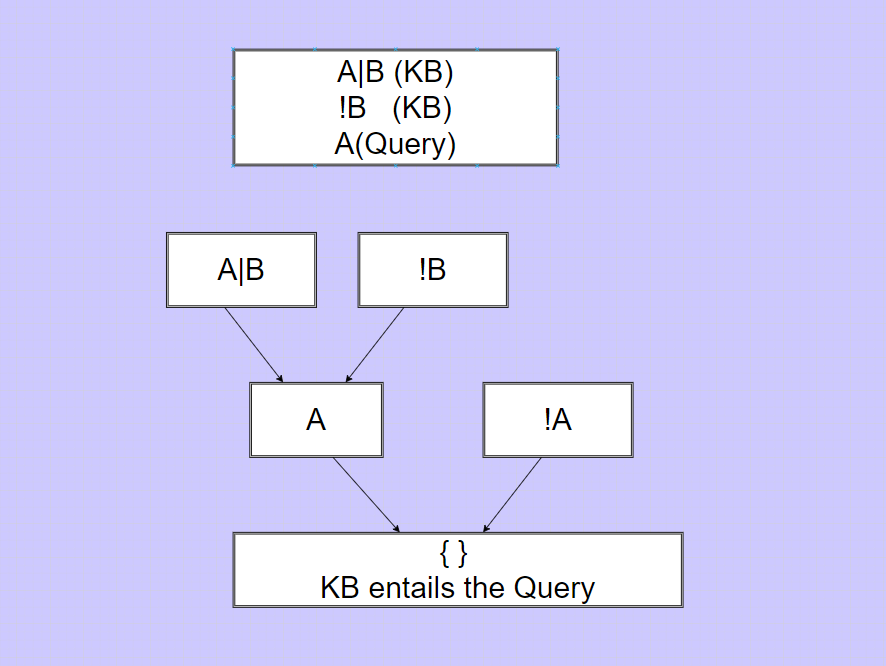